# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

78144


# 1. Create field-of-view class

In [118]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)
reload(ia.External.Fitting_v4)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_6\20200707-IMR90_SI16-5kb',
             'save_folder':r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13',
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20200803-Corrections_3color',
             'shared_parameters':{
                     'single_im_size':[30,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':200,
                     'max_num_seeds': 1000,
                     'spot_seeding_th':150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [122]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=3,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 37
- Number of field of views: 81
- Importing csv file: \\10.245.74.158\Chromatin_NAS_6\20200707-IMR90_SI16-5kb\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 32 folders are found according to color-usage annotation.
+ loading fov_info from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 6.513s.
+ loading correction from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segment

### 2. Process image into candidate spots

In [4]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(1,4),
                                                 #_parallel=False,
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 32 folders
-- checking unique, region:[1 2 3] in 0.756s.
-- checking unique, region:[4 5 6] in 0.010s.
-- checking unique, region:[7 8 9] in 0.008s.
-- checking unique, region:[10 11 12] in 0.008s.
-- checking unique, region:[13 14 15] in 0.008s.
-- checking unique, region:[16 17 18] in 0.008s.
-- checking unique, region:[19 20 21] in 0.007s.
-- checking unique, region:[22 23 24] in 0.007s.
-- checking unique, region:[25 26 27] in 0.008s.
-- checking unique, region:[28 29 30] in 0.008s.
-- checking unique, region:[31 32 33] in 0.008s.
-- checking unique, region:[34 35 36] in 0.007s.
-- checking unique, region:[37 38 39] in 0.009s.
-- checking unique, region:[40 41 42] in 0.015s.
-- checking unique, region:[43 44 45] in 0.008s.
-- checking unique, region:[46 47 48] in 0.008s.
-- checking unique, region:[49 50 51] in 0.007s.
-- checking unique, region:[52 53 54] in 0.007s.
-- checking unique, region:[55 56 57] in 0.008s.
-- checking unique, reg

# 3. Find chromosomes

## 3.1 load chromosome image

In [11]:
overwrite_chrom = True 

In [5]:
chrom_im = fov._load_chromosome_image(_type='forward', 
                                      _overwrite=overwrite_chrom)

directly return existing attribute.


## 3.2 find candidate chromosomes

In [12]:
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=3,
                                                               _binary_per_th=99.8, 
                                                               _morphology_size=2,
                                                               _overwrite=overwrite_chrom)

-- adjust seed image with filter size=3
-- binarize image with threshold: 99.8%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:467: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- find objects larger than size=50
-- 108 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 32 threads in 143.586s.
-- saving fov_info to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.105s.


## 3.3 select among candidate chromosomes

In [13]:
chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.5,
                                                         _cand_spot_intensity_th=10,
                                                         _save=True, 
                                                         _overwrite=overwrite_chrom)

+ loading unique from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ finish loading unique in 0.164s. 
- start select from 108 chromosomes with loss threshold=0.5
-- remove chr id 99, percentage of lost rounds:0.581.
-- 107 chromosomes are kept.
-- saving fov_info to file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ base attributes saved:['chrom_coords'] in 0.084s.


### visualize chromosomes selections

<IPython.core.display.Javascript object>


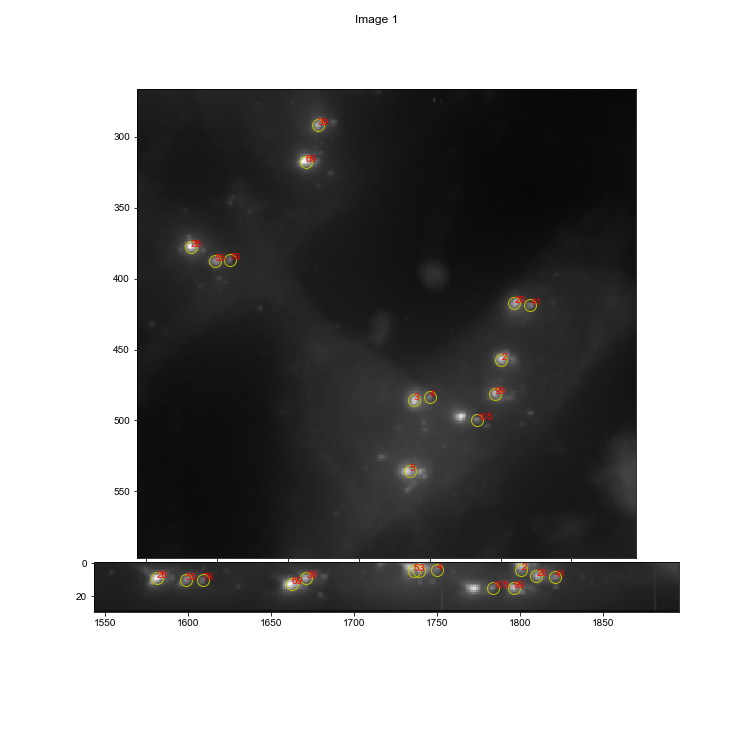

In [452]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )

## select spots based on chromosomes

In [147]:
fov._load_from_file('unique', _overwrite=True)

+ loading unique from file: \\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200707_IMR90_5kb_SI13\Conv_zscan_03.hdf5
++ finish loading unique in 0.149s. 


In [148]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    raw_spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['raw_spots'][:]]
    spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['spots'][:]]

In [425]:
intensity_th = 1.0
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
#for _spots in raw_spots_list:
    kept_spots_list.append(_spots[_spots[:,0]/_spots[:,4]  >= intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 107


In [453]:
reload(spot_tools.picking)

dna_cand_hzxys_list = [spot_tools.picking.convert_spots_to_hzxys(
                        _spots_list, fov.shared_parameters['distance_zxy'], 
                        normalize_spot_background=True)
                       for _spots_list in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids
dna_reg_channels = fov.unique_channels
chrom_coords = fov.chrom_coords


# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 3000nm
good_chr_th = 0.5 # 80% of regions should have candidate spots

sel_dna_cand_hzxys_list = []
sel_chrom_coords = []
chr_cand_pers = []
sel_chr_cand_pers = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _chr_cand_per = 0
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th)])
            _chr_cand_per += 1
    
    _chr_cand_per *= 1/len(_cand_hzxys)
    # append
    if _chr_cand_per >= good_chr_th:
        sel_dna_cand_hzxys_list.append(_sel_cands_list)
        sel_chrom_coords.append(_chrom_coord)
        sel_chr_cand_pers.append(_chr_cand_per)
    
    chr_cand_pers.append(_chr_cand_per)
    
print(f"kept chromosomes: {len(sel_chrom_coords)}")

kept chromosomes: 91


<IPython.core.display.Javascript object>


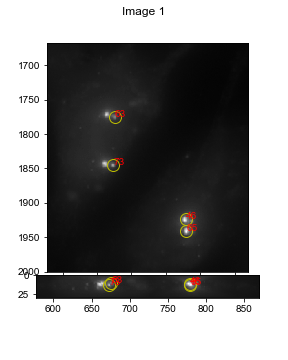

In [454]:
%matplotlib notebook
%matplotlib notebook
## visualize
coord_dict = {'coords':[np.flipud(_coord) for _coord in sel_chrom_coords],
              'class_ids':list(np.zeros(len(sel_chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               )

### EM pick spots

+ iter:0
-- generate reference metrics
--- multiprocessing expectation step with 32 threads, in 5.369s
--- collapse all regions into 1d.


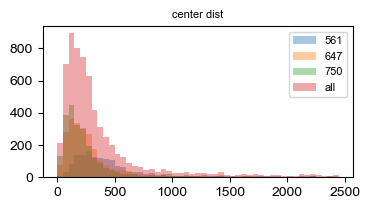

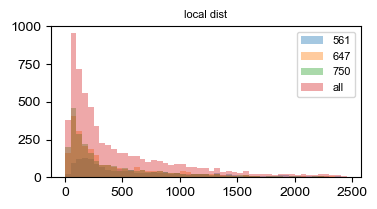

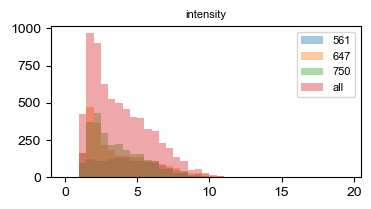

- pick spots by scores
--- multiprocessing maximization step with 32 threads, in 4.485s
-- region kept: 0.8871


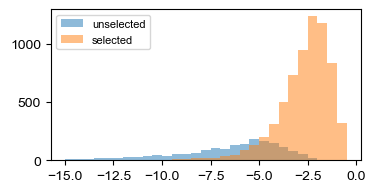

+ iter:1
-- generate reference metrics
--- multiprocessing expectation step with 32 threads, in 5.490s
--- collapse all regions into 1d.


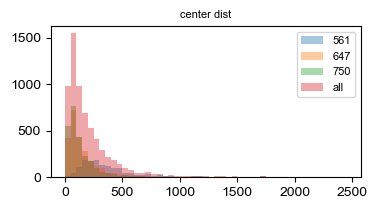

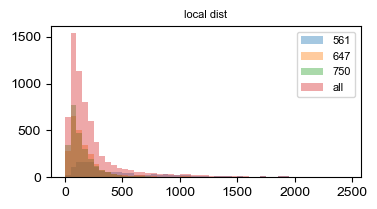

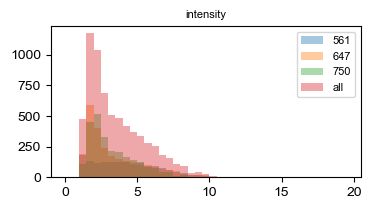

- pick spots by scores
--- multiprocessing maximization step with 32 threads, in 5.039s
-- region kept: 0.9858


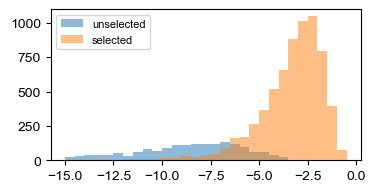

+ iter:2
-- generate reference metrics
--- multiprocessing expectation step with 32 threads, in 5.390s
--- collapse all regions into 1d.


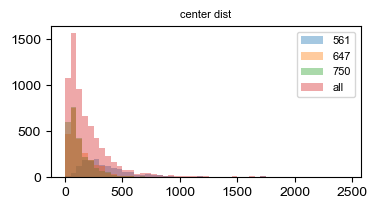

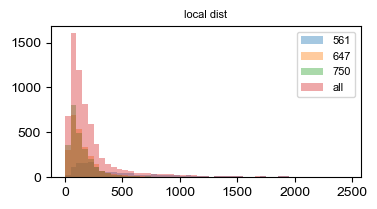

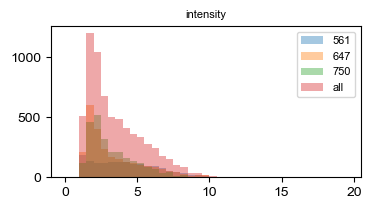

- pick spots by scores
--- multiprocessing maximization step with 32 threads, in 4.761s
-- region kept: 0.9979


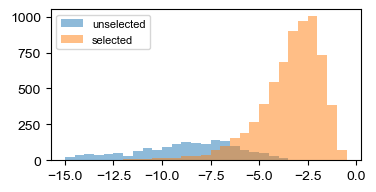

+ iter:3
-- generate reference metrics
--- multiprocessing expectation step with 32 threads, in 5.372s
--- collapse all regions into 1d.


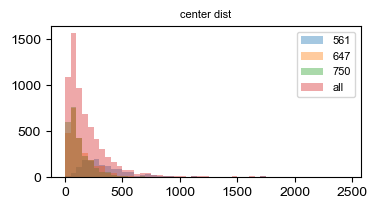

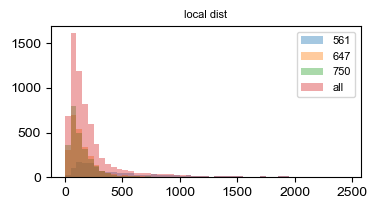

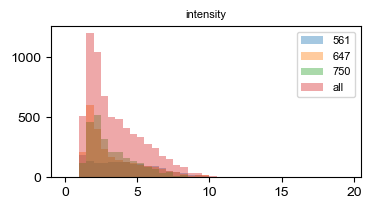

- pick spots by scores
--- multiprocessing maximization step with 32 threads, in 4.464s
-- region kept: 0.9994


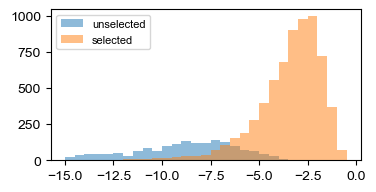

In [427]:
%matplotlib inline
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import _maximize_score_spot_picking_of_chr, pick_spots_by_intensities,pick_spots_by_scores, generate_reference_from_population, evaluate_differences

niter= 10
num_threads = 32
ref_chr_cts = None
# initialize
init_dna_hzxys = pick_spots_by_intensities(sel_dna_cand_hzxys_list)
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []

for _iter in range(niter):
    print(f"+ iter:{_iter}")
    # E: generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1], dna_reg_ids,
        ref_channels=dna_reg_channels,
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_channels=True,
        verbose=True,
    )
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ct_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('center dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_local_dists.items():
        plt.hist(np.array(_v), bins=np.arange(0,2500,50), alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('local dist', fontsize=8)
    plt.show()
    
    plt.figure(figsize=(4,2), dpi=100)
    for _k, _v in ref_ints.items():
        plt.hist(np.array(_v), 
                 #bins=np.arange(0,5000,100), 
                 bins=np.arange(0,20,0.5),
                 alpha=0.4, label=_k)
    plt.legend(fontsize=8)
    plt.title('intensity', fontsize=8)
    plt.show()
    
    # M: pick based on scores
    sel_hzxys_list, sel_scores_list, all_scores_list, other_scores_list = \
    pick_spots_by_scores(
        sel_dna_cand_hzxys_list, dna_reg_ids,
        ref_hzxys_list=sel_dna_hzxys_list[-1], ref_ids=dna_reg_ids, ref_channels=dna_reg_channels,
        ref_ct_dists=ref_ct_dists, ref_local_dists=ref_local_dists, ref_ints=ref_ints, 
        ref_chr_cts=ref_chr_cts,
        num_threads=num_threads,
        collapse_regions=True,
        split_intensity_channels=True,
        split_distance_channels=False,
        return_other_scores=True,
        verbose=True,
    )
    # check updating rate
    update_rate = evaluate_differences(sel_hzxys_list, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    # append
    sel_dna_hzxys_list.append(sel_hzxys_list)
    sel_dna_scores_list.append(sel_scores_list)
    all_dna_scores_list.append(all_scores_list)
    
    plt.figure(figsize=(4,2), dpi=100)
    plt.hist(np.concatenate([np.concatenate(_scores) 
                       for _scores in other_scores_list]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='unselected')
    plt.hist(np.ravel([np.array(_sel_scores) 
                       for _sel_scores in sel_dna_scores_list[-1]]), 
             bins=np.arange(-15, 0, 0.5), alpha=0.5, label='selected')
    plt.legend(fontsize=8)
    plt.show()
    
    if update_rate > 0.998:
        break

<IPython.core.display.Javascript object>


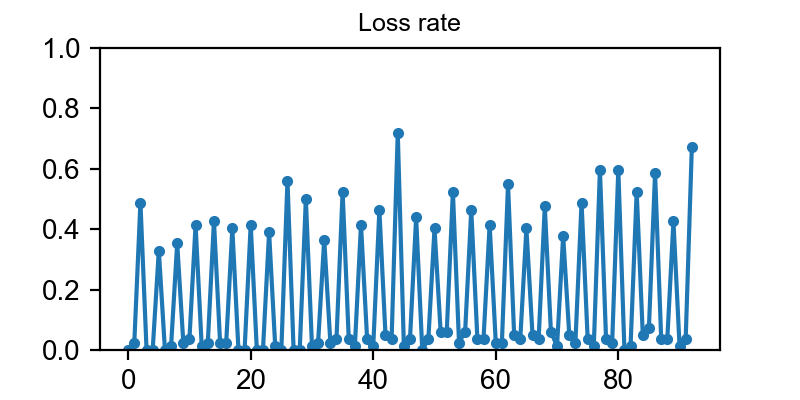

0.1750590086546027


In [468]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = -6.5
int_th = 1
bad_spot_percentage = 1.0

chr_channel_cts = {_ch:[] for _ch in np.unique(dna_reg_channels)}

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    # remove spots by intensity
    _bad_inds = _kept_hzxys[:,0] < int_th
    # remove spots by scores
    _bad_inds += _scores < score_th
    #print(np.mean(_bad_inds))
    _kept_hzxys[_bad_inds] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        # adjust center of each color
        _adjusted_hzxys = _kept_hzxys.copy()
        for _ch in np.unique(dna_reg_channels):
            _ch_reg_inds = np.where(np.array(dna_reg_channels)==_ch)[0]
            _ch_ct = np.nanmean(_adjusted_hzxys[_ch_reg_inds], axis=0)[1:4]
            chr_channel_cts[_ch].append(_ch_ct)
            _adjusted_hzxys[_ch_reg_inds,1:4] = _adjusted_hzxys[_ch_reg_inds,1:4] - _ch_ct

        #final_dna_hzxys_list.append(_adjusted_hzxys)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(final_dna_hzxys_list[-1][:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
#kept_chrom_coords = np.array(sel_chrom_coords)[kept_chr_ids]
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,len(median_distmap),20))
ax.set_ylim([0,1])
ax.set_title(f"Loss rate", fontsize=9)
plt.show()
print(np.mean(loss_rates))

In [ ]:
chr_channel_cts = {_ch:[] for _ch in np.unique(dna_reg_channels)}
chr_channel_nums = {_ch:[] for _ch in np.unique(dna_reg_channels)}
for _cand_list in sel_dna_cand_hzxys_list:
    for _ch in chr_channel_cts:
        _ch_cands = [_spots for _spots, _cand_ch in zip(_cand_list, dna_reg_channels) if _ch==_cand_ch]
        _ch_cands = np.concatenate([_s for _s in _ch_cands if len(_s) > 0])
        _ch_ct = np.nanmedian(_ch_cands, axis=0)
        chr_channel_cts[_ch].append(_ch_ct[1:])
        chr_channel_nums[_ch].append(len(_ch_cands))
        print(_ch, _ch_cands.shape, _ch_ct)
    #break
    
%matplotlib notebook
%matplotlib notebook

plt.figure(figsize=(4,4),dpi=200)
for _ch in chr_channel_cts:
    _cts = np.array(chr_channel_cts[_ch])
    
    plt.plot(_cts[:,1], _cts[:,2], '.', markersize=2,label=f"{_ch}",alpha=0.5)
plt.legend()
#plt.show()

## without centering color ct

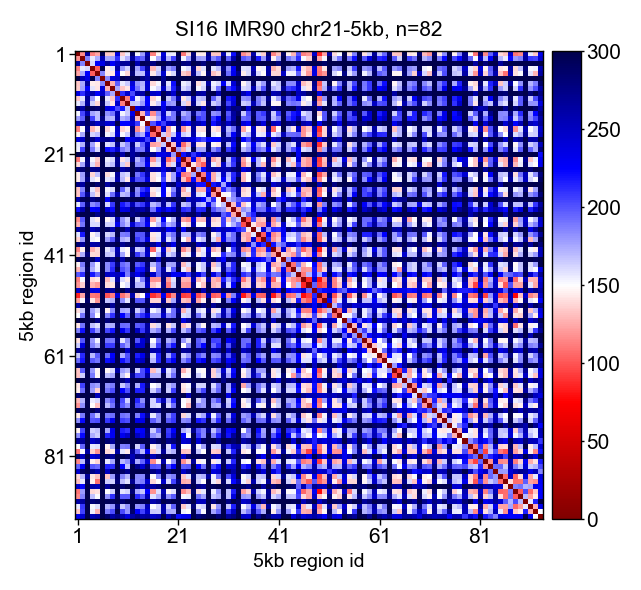

In [469]:
imaging_order = []
for _fd, _infos in fov.color_dic.items():
    for _info in _infos:
        if len(_info) > 0 and _info[0] == 'u':
            imaging_order.append(list(dna_reg_ids).index(int(_info[1:])))
imaging_order = np.array(imaging_order, dtype=np.int)
#kept_inds = imaging_order # plot imaging ordered regions

#kept_inds = np.where(loss_rates<0.2)[0] # plot good regions only
kept_inds = np.where(np.array(dna_reg_channels)=='561')[0] # plot certain region channel
kept_inds = np.where(np.array(dna_reg_channels)!='561')[0] # plot except certain region channel
kept_inds = np.arange(len(fov.unique_ids)) # plot all

%matplotlib inline

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,300],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=500)
ax.set_title(f"SI16 IMR90 chr21-5kb, n={len(distmap_list)}", fontsize=7.5)

_ticks = np.arange(0, len(kept_inds), 20)
ax.set_xticks(_ticks)
ax.set_xticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_xlabel(f"5kb region id", fontsize=7, labelpad=2)
ax.set_yticks(_ticks)
ax.set_yticklabels(dna_reg_ids[kept_inds][_ticks])
ax.set_ylabel(f"5kb region id", fontsize=7, labelpad=2)


#ax.axvline(x=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])
#ax.axhline(y=np.where(fov.unique_ids[kept_inds]>300)[0][0], color=[1,1,0])

plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

In [123]:
auto_bead_im = fov._load_bead_image(1, _drift=auto_dft)

fit_bead_im = fov._load_bead_image(1, _drift=bead_dft)

correction_tools.alignment.cross_correlation_align_single_image(fov.ref_im, bd_im)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_6\20200707-IMR90_SI16-5kb\H1R1\Conv_zscan_03.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_6\20200707-IMR90_SI16-5kb\H1R1\Conv_zscan_03.dax  in 2.274s
-- removing hot pixels for channels:['488'] in 10.092s
-- illumination correction for channels: 488, in 1.985s
-- warp image with drift:[ 0.76 -0.03 -0.26] 488, in 77.836s
-- finish correction in 92.754s


In [120]:
reload(correction_tools.alignment)
auto_dft = correction_tools.alignment.align_image(fov.ref_im, bd_im, detailed_verbose=True)

-- start aligning given source image to given reference image.
--- use auto correlation to calculate drift.
--- align image 0 in 4.962s.
--- drift: [ 0.78  0.01 -0.21]
--- use auto correlation to calculate drift.
--- align image 1 in 4.924s.
--- drift: [ 0.83 -0.01 -0.23]
--- use auto correlation to calculate drift.
--- align image 2 in 4.973s.
--- drift: [ 0.66 -0.09 -0.33]
--- drifts for [0 1 2] pass the thresold, exit cycle.


In [121]:
reload(correction_tools.alignment)
bead_dft = correction_tools.alignment.align_image(fov.ref_im, bd_im, use_autocorr=False, detailed_verbose=True)

-- start aligning given source image to given reference image.
-- start fitting spots in channel:488, 130 seeded, 130 fitted in 6.170s.
-- start fitting spots in channel:488, 132 seeded, 132 fitted in 6.494s.
-- 131 among 132 centers are selected by th=2.0
-- aligning 130 centers to 131 ref_centers, given drift:[1. 0. 0.], 129 pairs found, updated_drift:[ 0.81  0.01 -0.28]
before check: [ 0.8093614   0.01417088 -0.28422987] 129
-- check 129 pairs of centers, 116 pairs kept. new drift:[ 0.81 -0.01 -0.29]
--- align image 0 in 13.533s.
--- drift: [ 0.81033016 -0.01342275 -0.2917709 ]
-- start fitting spots in channel:488, 147 seeded, 147 fitted in 6.470s.
-- start fitting spots in channel:488, 143 seeded, 143 fitted in 6.169s.
-- 143 among 143 centers are selected by th=2.0
-- aligning 146 centers to 143 ref_centers, given drift:[1. 0. 0.], 138 pairs found, updated_drift:[ 0.93 -0.01 -0.36]
before check: [ 0.93015015 -0.01203665 -0.36268604] 138
-- check 138 pairs of centers, 130 pairs ke

<IPython.core.display.Javascript object>


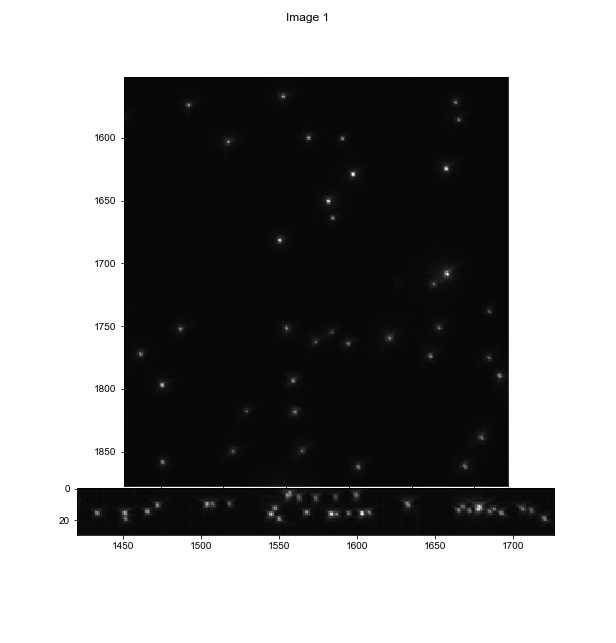

In [127]:
%matplotlib notebook
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([fov.ref_im, bd_im, auto_bead_im, fit_bead_im])

## visualize single example

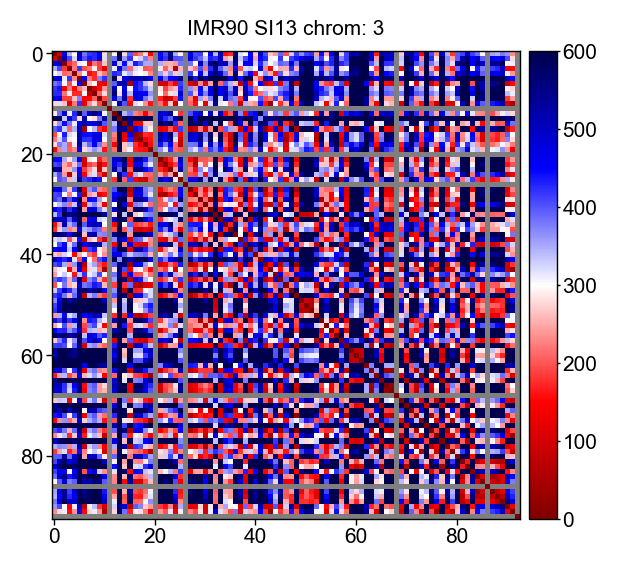

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x000001F1F7BFEE88>


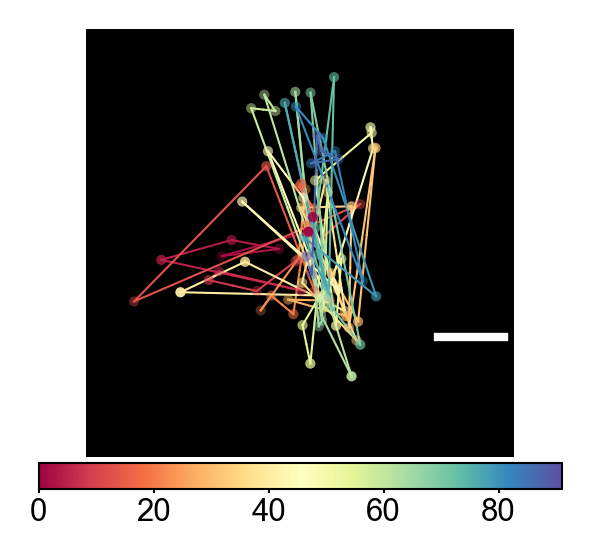

In [470]:
%matplotlib inline

reload(figure_tools.image)

chrom_id = 3

import matplotlib
import copy

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

#valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(
        distmap_list[chrom_id][valid_inds][:,valid_inds], 
        color_limits=[0,600],
        ax=ax,
        cmap=sc_cmap,
        ticks=np.arange(0,len(valid_inds),20), 
        figure_dpi=200)
ax.set_title(f"IMR90 SI13 chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        marker_edge_line_width=0, pca_align=True,
        reference_bar_length=200, image_radius=200, 
        line_width=0.5, figure_dpi=300, depthshade=True)
#plt.show()

In [435]:
plt.close('all')

In [472]:
len(sel_chrom_coords)

91

In [471]:
%matplotlib notebook
%matplotlib notebook

#chrom_id = 5

print(np.array(sel_chrom_coords)[kept_chr_ids][chrom_id])

#valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]
valid_inds = np.ones(len(final_dna_hzxys_list[chrom_id]), dtype=np.bool) # all spots

sc_cmap = copy.copy(matplotlib.cm.get_cmap('seismic_r'))
sc_cmap.set_bad(color=[0.5,0.5,0.5,1])

exist_channels = np.unique(dna_reg_channels)
channel_colors = []
for _ch in dna_reg_channels:
    channel_colors.append(sc_cmap(np.where(_ch==exist_channels)[0][0]/len(exist_channels)))

    
ax3d = figure_tools.image.chromosome_structure_3d_rendering(
        final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
        cmap=channel_colors,
        marker_edge_line_width=0, pca_align=True,
        reference_bar_length=200, image_radius=200, 
        line_width=0., figure_dpi=300, depthshade=True)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 91 but corresponding boolean dimension is 82

## visualize picked spots

Note: this section requires raw_spots for fov class, which is a new feature.

if you don't have this feature in older version, run "_process_image_to_spots" with 

"_overwrite_spots=True" will automatically append this feature.

In [473]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    raw_spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['raw_spots'][:]]
    spots_list = [_spots[_spots[:,0] > 0] for _spots in _grp['spots'][:]]

In [478]:
from scipy.spatial.distance import cdist
picked_spot_inds_list = []
for _i, _id in enumerate(dna_reg_ids):
    _cand_hzxys = spots_list[_i][:,1:4] * fov.shared_parameters['distance_zxy']
    _dists = cdist(np.array(final_dna_hzxys_list)[:,_i,1:], _cand_hzxys)#, axis=1
    #_dists = cdist(np.array(sel_dna_hzxys_list[0])[:,_i,1:], _cand_hzxys)#, axis=1
    _matched_spot_inds = []
    for _ds in _dists:
        if np.sum(np.isnan(_ds)) < len(_ds) and np.nanmin(_ds) < 0.1:
            _matched_spot_inds.append(np.argmin(_ds))
        else:
            _matched_spot_inds.append(np.nan)
    # append
    picked_spot_inds_list.append(np.array(_matched_spot_inds))

array([ 2,  5,  8, 11, 14, 17, 20])

In [486]:
#vis_inds = np.arange(6,18)
vis_inds = np.arange(2,32,3)#[0,1,2,3,4,5]

vis_ims, vis_ids, vis_spot_list, vis_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_inds:
        vis_ims.append(_grp['ims'][_ind])
        vis_ids.append(_grp['ids'][_ind])
        _picked_inds = picked_spot_inds_list[_ind]
        _picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        vis_spot_list.append(raw_spots_list[_ind][_picked_inds])

In [479]:
vis_spot_list = []
for _ind in vis_inds:
    _picked_inds = picked_spot_inds_list[_ind]
    _picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
    vis_spot_list.append(raw_spots_list[_ind][_picked_inds])

In [456]:
vis_spot_list[7 -1][49 -1]

array([ 8.3866870e+02,  1.3302089e+01,  1.7333052e+03,  4.5979797e+02,
        3.0008121e+02,  2.0564036e+00,  2.4282463e+00,  2.4118223e+00,
       -1.8278340e-01, -2.0948766e-01,  5.3501038e+01], dtype=float32)

<IPython.core.display.Javascript object>


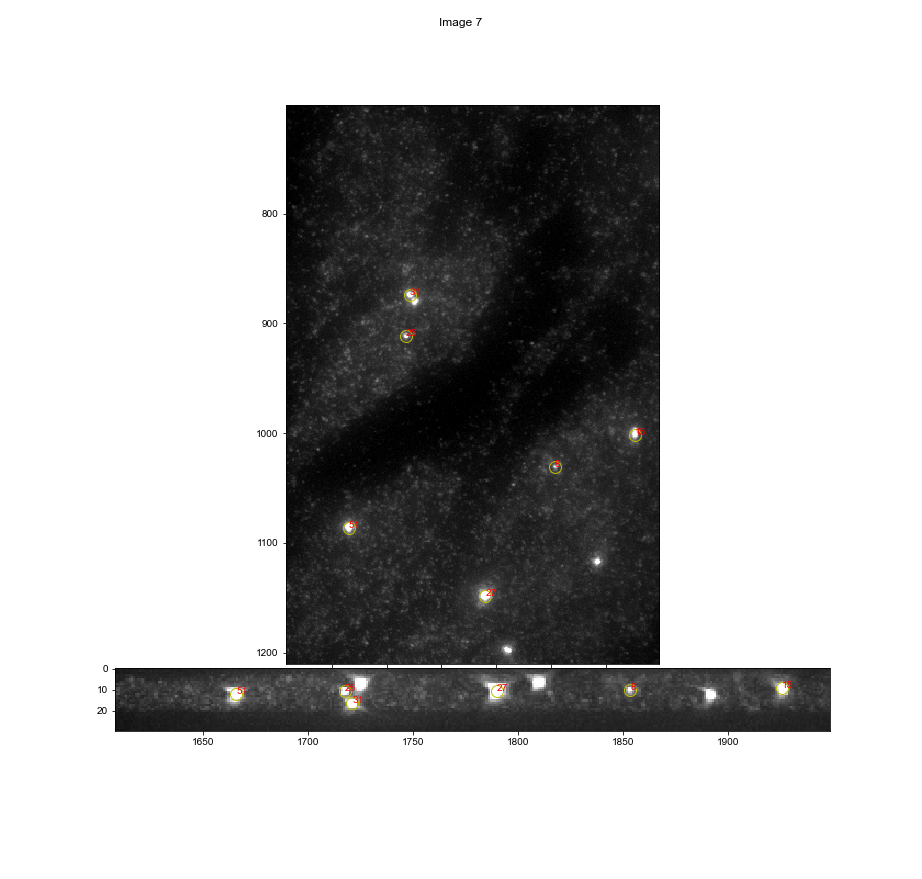

In [487]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_spot_list):
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_spots),dtype=np.int))

 
    
visual_tools.imshow_mark_3d_v2(vis_ims, 
                               given_dic=coord_dict,
                               save_file=None,
                               )


## visualize all fitted spots

In [101]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    print(_grp.keys())
    print(_grp['flags'][:3])

<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
[1 1 1]


In [61]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    print(_f.attrs['shared_parameters'])

{'single_im_size': [30, 2048, 2048], 'corr_channels': ['750', '647', '561'], 'num_empty_frames': 0, 'corr_hot_pixel': True, 'corr_Z_shift': False, 'min_num_seeds': 200, 'max_num_seeds': 1000, 'spot_seeding_th': 150, 'normalize_intensity_local': False, 'normalize_intensity_background': False, 'distance_zxy': [200, 108, 108], 'sigma_zxy': [1.35, 1.9, 1.9], 'num_buffer_frames': 10, 'normalization': False, 'corr_bleed': True, 'corr_illumination': True, 'corr_chromatic': True, 'allowed_data_types': {'combo': 'c', 'decoded': 'd', 'unique': 'u', 'relabeled_unique': 'l', 'merfish': 'm', 'rna-unique': 'r', 'rna': 'r', 'gene': 'g'}, 'drift_use_fft': True, 'drift_sequential': False, 'good_drift_th': 1.0, 'drift_precision_fold': 100, 'drift_correction_args': {}, 'empty_value': 0}


(array([ 6.,  5.,  4.,  9., 10., 11.,  9., 15., 16., 14., 20., 25., 31.,
        40., 38., 28., 28., 36., 34., 36., 35., 30., 34., 31., 29., 22.,
        33., 24., 23., 21., 25., 25., 22., 23., 18., 19., 14., 18., 16.,
        12.,  5., 12.,  3.,  6., 15.,  4.,  9.,  4.,  2.,  5.,  2.,  7.,
         3.,  4.,  4.,  1.,  1.,  3.,  1.,  3.,  3.,  0.,  2.,  0.,  2.,
         0.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

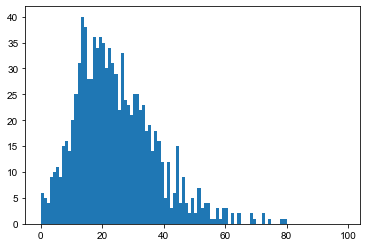

In [109]:
plt.figure()
plt.hist(fov.unique_spots_list[0][:,0], bins=np.arange(0,100,1))

In [ ]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _ind = list(_grp['ids'][:]).index(41)
    _im = _grp['ims'][_ind]
    sel_drifts = _grp['drifts'][:,:]
    sel_flags = _grp['flags'][:]
    sel_ids = _grp['ids'][:]
    sel_spots = _grp['spots'][:,:,:]
    print(_ind, np.sum(_grp['spots'][1]))

<IPython.core.display.Javascript object>


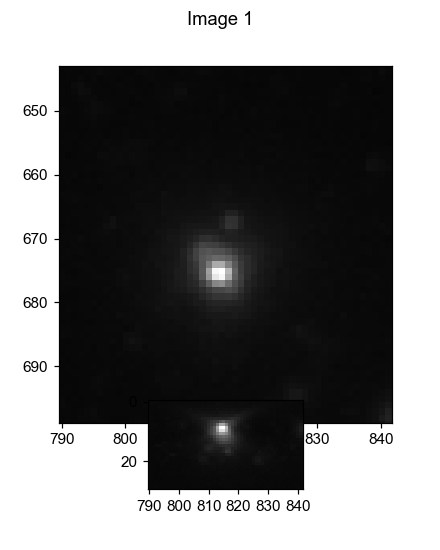

In [21]:
%matplotlib notebook
visual_tools.imshow_mark_3d_v2([_im])